# Boston House Prediction by Regression Model

In [ ]:
#importing all libraries 
import numpy as np
import pandas as pd 
import sklearn

In [ ]:
#loading the boston dataset from sklearn package 
from sklearn.datasets import load_boston
data=load_boston()

In [ ]:
#get all the keys of dataset dictionary
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

So we are studying based on 506 houses and we have 13 categorical variable from the dataset and also there is no none values in the dataset

In [ ]:
print(data.feature_names) #print all the column names 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(data.filename) #where file is stored

C:\Users\HP\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [ ]:
print(data.target) #expected cost price of the house

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
boston_data=pd.DataFrame(data.data,columns=data.feature_names)# to get a tabular Representation 
boston_data.head() #it will show first 5 rows 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_data.tail() # it will show last 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
boston_data["Target_value"]=data.target #assigning a new coloumn name "Target_value" in dataframe 
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(boston_data.shape) #checking the shape of the dataframe

(506, 14)


In [ ]:
print(boston_data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
#checking null values 
boston_data.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
Target_value    0
dtype: int64

So there is no null values in each column. So data cleaning is not required.

In [ ]:
#Scatter plot of Hours vs Score
import matplotlib.pyplot as plt

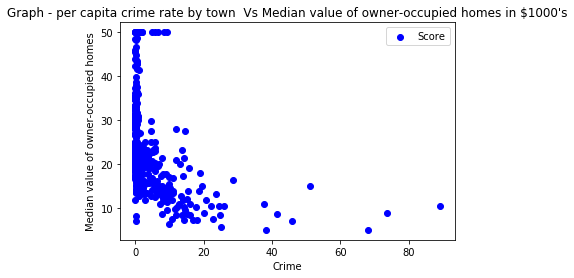

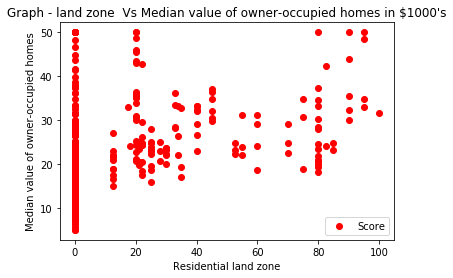

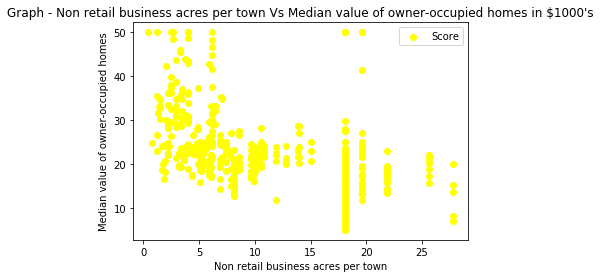

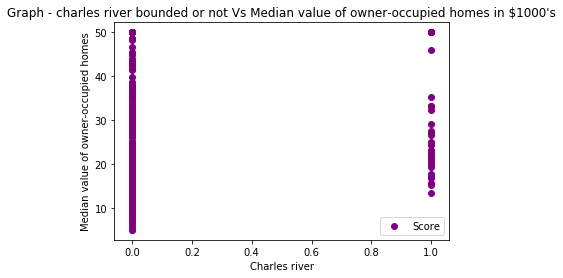

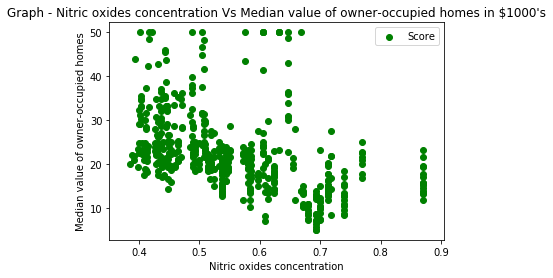

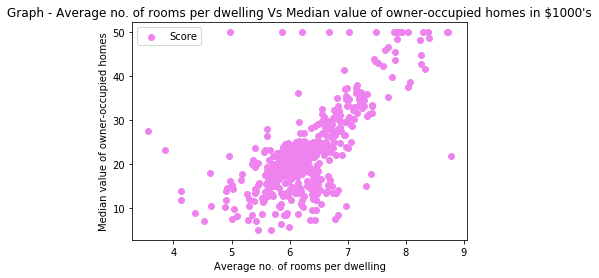

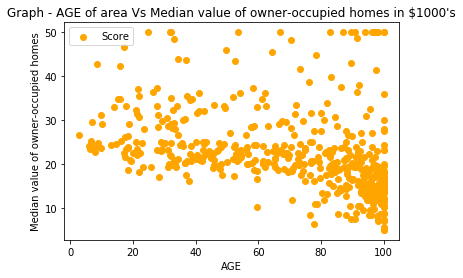

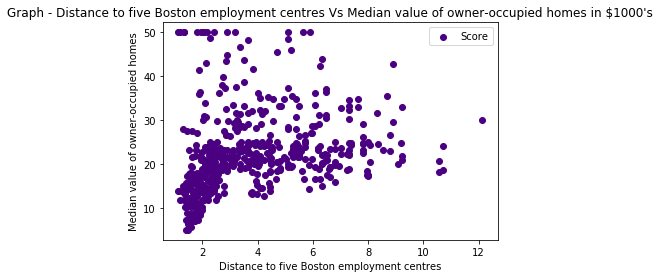

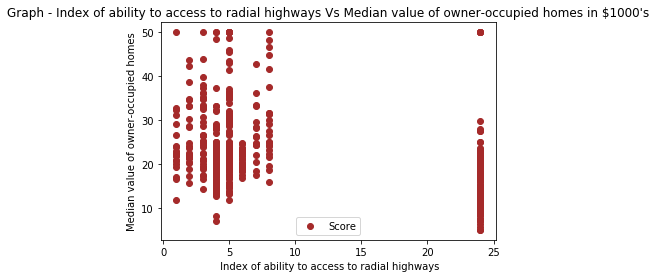

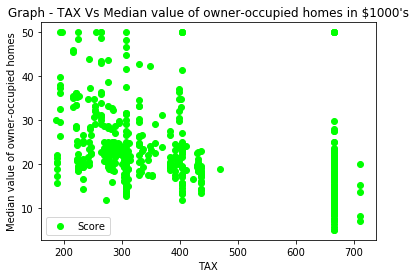

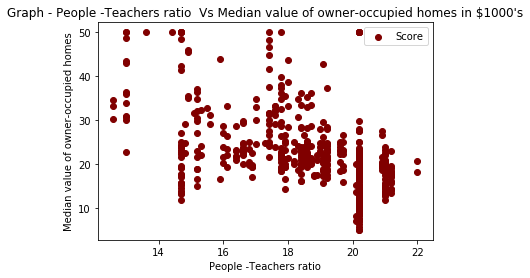

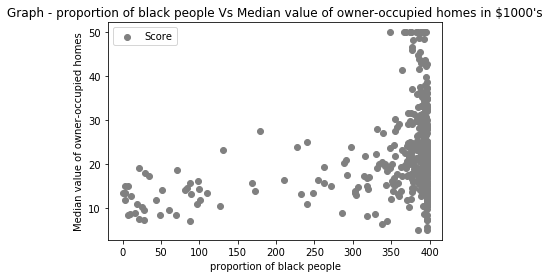

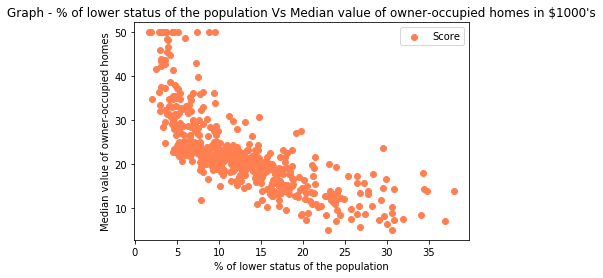

In [ ]:
plt.scatter(boston_data.CRIM,boston_data.Target_value,label='Score',color='blue')
plt.title("Graph - per capita crime rate by town  Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Crime")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.ZN,boston_data.Target_value,label='Score',color='red')
plt.title("Graph - land zone  Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Residential land zone")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.INDUS,boston_data.Target_value,label='Score',color='yellow')
plt.title("Graph - Non retail business acres per town Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Non retail business acres per town")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()


plt.scatter(boston_data.CHAS,boston_data.Target_value,label='Score',color='purple')
plt.title("Graph - charles river bounded or not Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Charles river")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.NOX,boston_data.Target_value,label='Score',color='green')
plt.title("Graph - Nitric oxides concentration Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Nitric oxides concentration")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.RM,boston_data.Target_value,label='Score',color='violet')
plt.title("Graph - Average no. of rooms per dwelling Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Average no. of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.AGE,boston_data.Target_value,label='Score',color='orange')
plt.title("Graph - AGE of area Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("AGE")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.DIS,boston_data.Target_value,label='Score',color='indigo')
plt.title("Graph - Distance to five Boston employment centres Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Distance to five Boston employment centres")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.RAD,boston_data.Target_value,label='Score',color='brown')
plt.title("Graph - Index of ability to access to radial highways Vs Median value of owner-occupied homes in $1000's")
plt.xlabel(" Index of ability to access to radial highways")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.TAX,boston_data.Target_value,label='Score',color='lime')
plt.title("Graph - TAX Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("TAX")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.PTRATIO,boston_data.Target_value,label='Score',color='maroon')
plt.title("Graph - People -Teachers ratio  Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("People -Teachers ratio")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.B,boston_data.Target_value,label='Score',color='grey')
plt.title("Graph - proportion of black people Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("proportion of black people")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()

plt.scatter(boston_data.LSTAT,boston_data.Target_value,label='Score',color='coral')
plt.title("Graph - % of lower status of the population Vs Median value of owner-occupied homes in $1000's")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of owner-occupied homes")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

Now we split our dataset into Train and Test Data. We will use Train Dataset to build the model and Test Dataset to predict the the Dataset by using the model 

In [ ]:
x=boston_data.drop("Target_value",axis=1)
y=boston_data["Target_value"]
#here we split dataset in 80-20 ratio
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=66)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# Fit Linear Regression Model 


In [ ]:
from sklearn.linear_model import LinearRegression #import Linear Regression 
from sklearn import metrics

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# the value of Intercept and Coefficient
print("Intercept :", linear_model.intercept_)
print("Coefficient of the Independent Variable :", linear_model.coef_)

Intercept : 42.586297305068285
Coefficient of the Independent Variable : [-1.29124243e-01  4.60162200e-02  2.46404449e-02  2.12576822e+00
 -1.82819798e+01  3.35436229e+00 -6.18071832e-03 -1.64225594e+00
  3.13694837e-01 -1.31019350e-02 -1.02213803e+00  8.47049428e-03
 -5.26472460e-01]


In [ ]:
y_train_predict=linear_model.predict(x_train) # for training dataset
y_test_predict=linear_model.predict(x_test) #for testing dataset

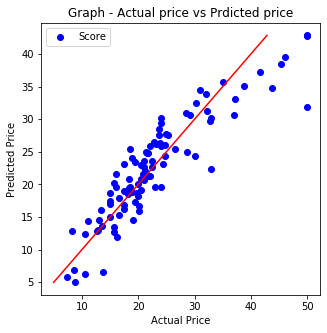

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_test_predict,label='Score',color='blue')
plt.title("Graph - Actual price vs Prdicted price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)],color="red")
plt.legend()
plt.show()

# Checking Error and Accuracy

In [ ]:
#Calculating Model Accuracy
print("Training Score :", linear_model.score(x_train, y_train))
print("Testing Score :", linear_model.score(x_test, y_test))

Training Score : 0.7205414401988551
Testing Score : 0.8111288663608665


In [ ]:
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_test_predict))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_test_predict))
print("R-2 Score :", metrics.r2_score(y_test, y_test_predict))

Mean Absolute Error : 2.976387505351339
Mean Squared Error : 15.786404126744856
R-2 Score : 0.8111288663608665


Comment - Our Model is giving 81.11% accurate results which is very good fit.
we can say that 81.11% of total variation in the dependent variable y that gets explained by the regression model.